In [1]:
from sklearn.linear_model import LogisticRegression
from timeit import default_timer as timer
from datetime import timedelta
import os
from sklearn import preprocessing
import numpy as np
from read_scripts import dict_2_arr 
from read_scripts import read_dataset 
from sklearn.utils.extmath import randomized_svd
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor


In [32]:
def SVD_reduce_dim(m, dim):
    need_full = False
    
    # compute svd
    U, S, _ = np.linalg.svd(m)
    
    # multiply U against Sigma
    reduced = np.matmul(U[:,:dim], np.diag(S[:dim]))
    
    return reduced

In [120]:
import matplotlib.pyplot as plt
import numpy as  np

def top_n_most_occuring_id(y_dict, N=5, max_examples=50):
    counts = {}
    keys = list(y_dict.keys())
    keys.sort()
    i = 0
    for k in keys:
        class_val = str(y_dict[k])
        if class_val in counts:
            counts[class_val].append(i)
        else: 
            counts[class_val] = [i]
        i += 1
    
    sorted_ = sorted(list(counts.values()), key=len, reverse=True)
    
    res = []
    for i in range(N):
        res.extend(sorted_[i][:max_examples])
    
    return res

def do_reduction_plot_for_data_set(X, y, samples_index, title_str):
    fig, ax = plt.subplots()
    scatter_x = X[samples_index,0]
    scatter_y = X[samples_index,1]
    group = y[samples_index]
    for g in np.unique(group):
        i = np.where(group == g)
        ax.scatter(scatter_x[i], scatter_y[i], label=g)
        
    plt.title(title_str)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()
    

In [121]:
# do dim reduce vis for conact
split = 'train'
y_dict = read_dataset('label', task, split)
X_e, y = dict_2_arr(read_dataset('elmo', task, split), y_dict)
X_t, y = dict_2_arr(read_dataset('transformer', task, split), y_dict)
X_u, y = dict_2_arr(read_dataset('unirep', task, split), y_dict)

X_e_SVD = SVD_reduce_dim(X_e, 2)
X_t_SVD = SVD_reduce_dim(X_t, 2)
X_u_SVD = SVD_reduce_dim(X_u, 2)

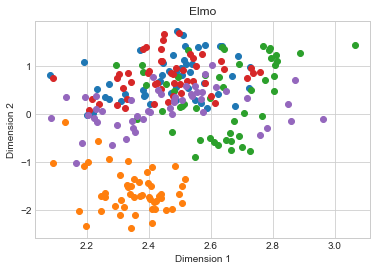

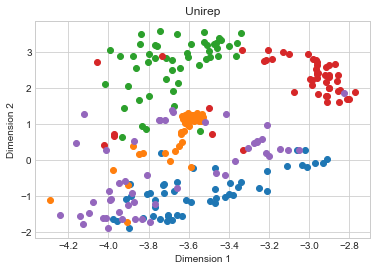

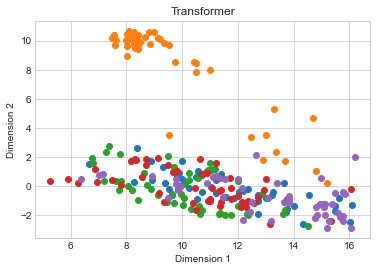

In [133]:
samples_index = top_n_most_occuring_id(y_dict)
do_reduction_plot_for_data_set(X_e_SVD, y, samples_index, "Elmo")
do_reduction_plot_for_data_set(X_u_SVD, y, samples_index, "Unirep")
do_reduction_plot_for_data_set(X_t_SVD, y, samples_index, "Transformer")

In [124]:
X_e_norm = preprocessing.normalize(X_e, norm='l2')
X_t_norm = preprocessing.normalize(X_t, norm='l2')
X_u_norm = preprocessing.normalize(X_u, norm='l2')

X_combined = np.concatenate([X_e_norm, X_t_norm, X_u_norm], axis=1)
X_combined_SVD = SVD_reduce_dim(X_combined, 2)

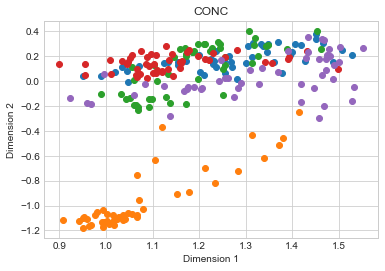

In [134]:
do_reduction_plot_for_data_set(X_combined_SVD, y, samples_index, "CONC")

In [138]:
X_e_norm = preprocessing.normalize(X_e, norm='l2') * 6
X_t_norm = preprocessing.normalize(X_t, norm='l2') * 3
X_u_norm = preprocessing.normalize(X_u, norm='l2') * 1

X_combined = np.concatenate([X_e_norm, X_t_norm, X_u_norm], axis=1)
X_combined_SVD = SVD_reduce_dim(X_combined, 2)

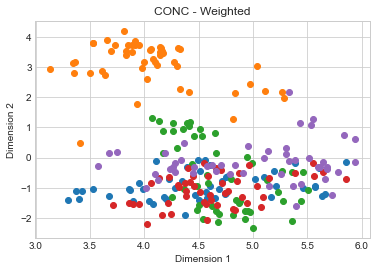

In [139]:
do_reduction_plot_for_data_set(X_combined_SVD, y, samples_index, "CONC - Weighted")